# Identification and Prediction of Credit Card Fraud (*DRAFT)

## 1. Introduction

Credit Card Fraud is defined as the unauthorized use of a recipient's/holder's financial credentials (primarily through the use of a credit card) and is one of the most prevalent cases of theft that is witnessed daily. 

With the advents of new technological mechanics, progressions of online scams as well as covert and intelligent theft methods, reports of credit card theft has increased within recent years. This notebook will showcase the use of machine learning models to identify the prevalence of credit card fraud through transaction information and other provided features. 

Other use cases will be covered such as Transaction Type Analysis in which certain types of transactions are more prone to fraud and Merchant Category Analysis which is how certain merchant categories are associated with Fraud. 



**Key questions include:**  
- Can we build a predictive model to forecast fraudulent behavior based on purchase data (and possibly other factors)?  
- And what do the results imply for security?  

## 2. Data 

## Credit Card Fraud Detection Dataset (OpenML, Kaggle)

### Key Features:

- id: Unique Identifier of Each Transaction
- V1-V28: Anonymized features representing various transaction attributes (e.g., time, location, etc.); these features are principal components that were transformed with PCA.
- Amount: The transaction amount
- Class: Binary label indicating whether the transaction is fraudulent (1) or not (0)

**Size:** 31 columns * 275,663 rows
Target Variable:
Features:

- Numeric: V1-V28, Amount
- Categorical: Class

(*Edit this Again)

### Description:

This dataset comprises credit card transactions made by European cardholders during the year 2023. With over 550,000 anonymized records, it serves as a valuable resource for developing fraud detection algorithms and models. The dataset includes various anonymized transaction attributes, such as time, location, merchant category, and transaction type. Each transaction is labeled as either fraudulent (1) or non-fraudulent (0), making it an ideal dataset for training and evaluating fraud detection systems. The data source is not disclosed to protect privacy and confidentiality.

(*Edit this again)

Citation: 
Nidula Elgiriyewithana. (2023). Credit Card Fraud Detection Dataset 2023 [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/6492730

In [13]:
# you may need to !pip install pandas_datareader / seaborn

# data handling
import pandas as pd
import numpy as np


import pandas_datareader.data as web

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import make_pipeline

from sklearn.pipeline import Pipeline

# clustering
from sklearn.cluster import KMeans

# train/test split and metrics
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# preprocessing & pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# suppress warnings
import warnings
warnings.filterwarnings('ignore')


In [14]:
df = pd.read_csv('data/creditcard_2023.csv')
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [15]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [16]:
df.isna().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [17]:
df.dtypes

id          int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [19]:
df.max()

id        568629.000000
V1             2.229046
V2             4.361865
V3            14.125834
V4             3.201536
V5            42.716891
V6            26.168402
V7           217.873038
V8             5.958040
V9            20.270062
V10           31.722709
V11            2.513573
V12           17.913556
V13            7.187486
V14           19.169544
V15           14.532202
V16           46.652906
V17            6.994124
V18            6.783716
V19            3.831672
V20           29.872812
V21            8.087080
V22           12.632511
V23           31.707627
V24           12.965639
V25           14.621509
V26            5.623285
V27          113.231093
V28           77.255937
Amount     24039.930000
Class          1.000000
dtype: float64

In [20]:
df.min()

id         0.000000
V1        -3.495584
V2       -49.966572
V3        -3.183760
V4        -4.951222
V5        -9.952786
V6       -21.111108
V7        -4.351839
V8       -10.756342
V9        -3.751919
V10       -3.163276
V11       -5.954723
V12       -2.020399
V13       -5.955227
V14       -2.107417
V15       -3.861813
V16       -2.214513
V17       -2.484938
V18       -2.421949
V19       -7.804988
V20      -78.147839
V21      -19.382523
V22       -7.734798
V23      -30.295450
V24       -4.067968
V25      -13.612633
V26       -8.226969
V27      -10.498633
V28      -39.035243
Amount    50.010000
Class      0.000000
dtype: float64

In [21]:
#

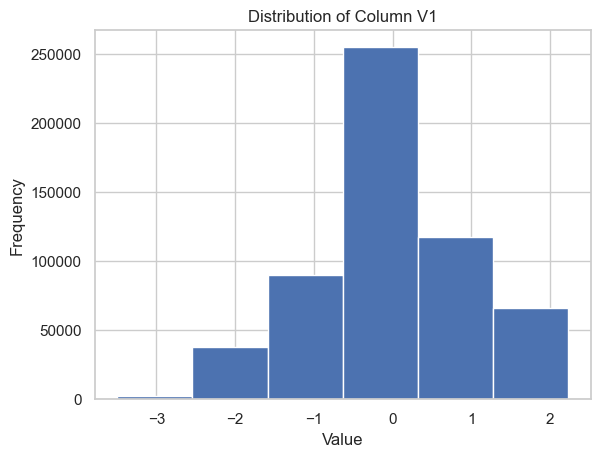

In [22]:
df['V1'].hist(bins=6)
plt.title('Distribution of Column V1')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

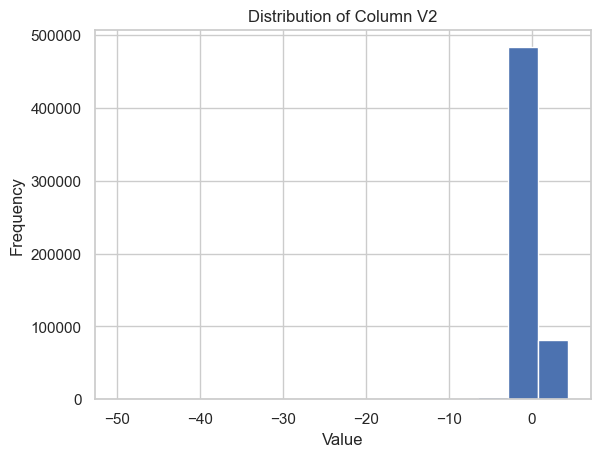

In [23]:
df['V2'].hist(bins = 15)
plt.title('Distribution of Column V2')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [24]:
df['V2'].min()

-49.96657153869079

In [25]:
df['V2'].max()

4.361865196721416

In [26]:
df.value_counts("V2")

V2
 2.599199    3539
 3.326970    1399
 0.528310     259
 1.399009     255
 1.314583     246
             ... 
-0.370815       1
-0.370816       1
-0.370816       1
-0.370817       1
 4.361865       1
Name: count, Length: 552035, dtype: int64

<Axes: ylabel='V2'>

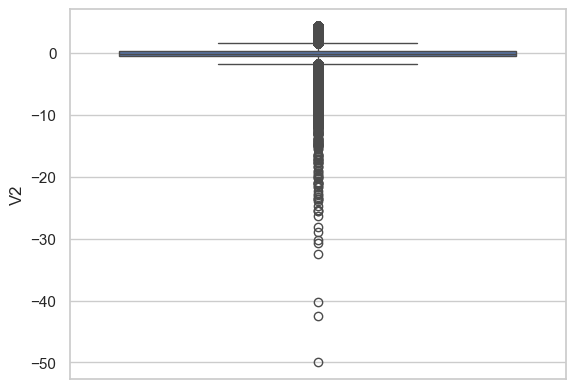

In [27]:
import seaborn as sns
sns.boxplot(y = df['V2'])

In [28]:
from scipy.stats import zscore
zscore = zscore(df['V2'])
print(zscore)

0        -0.469648
1        -0.356045
2        -0.949385
3        -0.508959
4        -0.165280
            ...   
568625    0.061886
568626   -0.202896
568627   -0.004095
568628   -0.516970
568629    0.433236
Name: V2, Length: 568630, dtype: float64


In [29]:
df.value_counts("Class")

Class
0    284315
1    284315
Name: count, dtype: int64

In [30]:
#Separate the normal transactions from the frauds and traing the data from there? Run comparisons

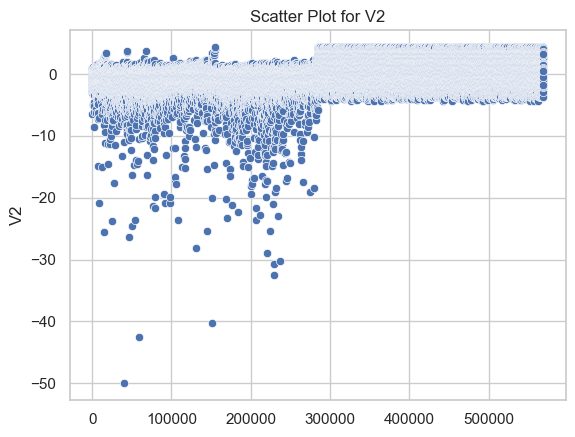

In [31]:
sns.scatterplot(data = df['V2'])
plt.title("Scatter Plot for V2")
plt.show()

In [32]:
from scipy.stats import zscore
z_s = zscore(df['V2'])
# print(z_s)
absol_z = z_s.abs()
# print(absol_z)
count = 0;

for i in absol_z:
    if i > 3:
        count += 1
else:
    print(count)

12203


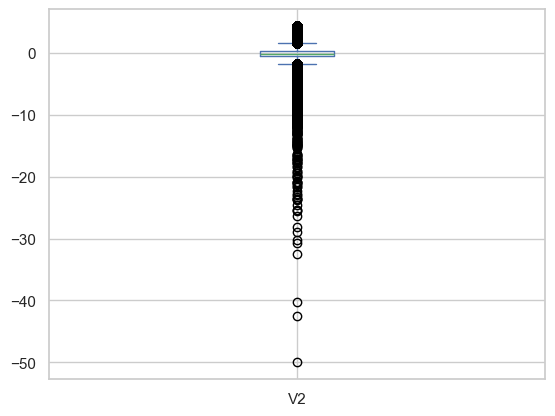

In [33]:
df['V2'].plot(kind='box')
plt.show()

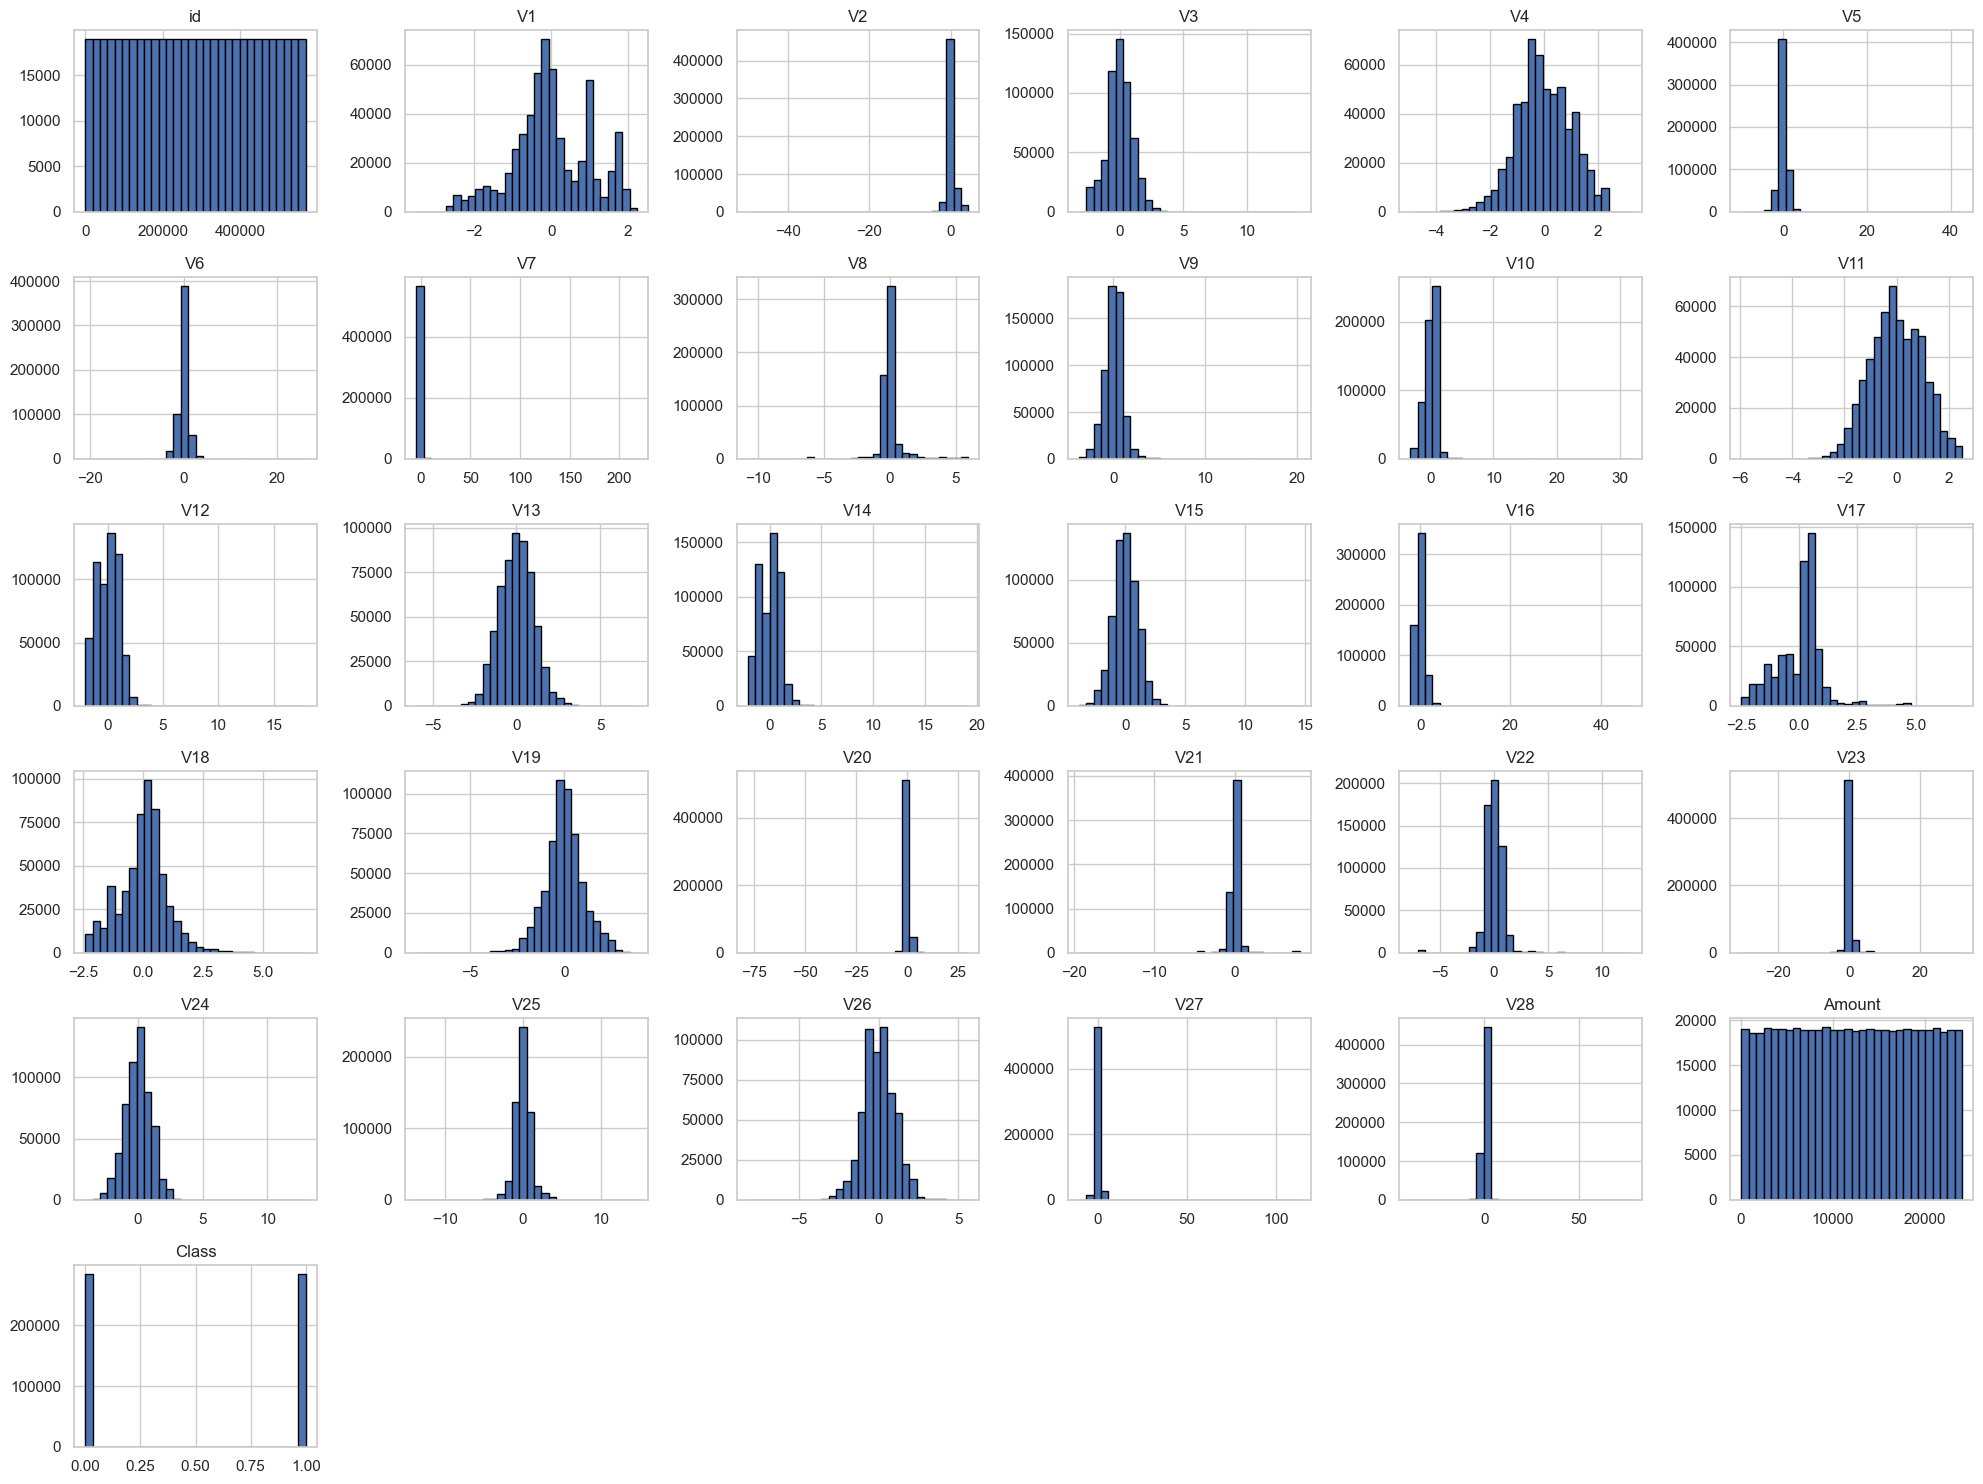

In [34]:
df.select_dtypes(include='number').hist(
    figsize=(20, 15),
    bins=30,
    edgecolor='black'
)

plt.tight_layout()
plt.show()

In [35]:
df['Amount'].describe()

count    568630.000000
mean      12041.957635
std        6919.644449
min          50.010000
25%        6054.892500
50%       12030.150000
75%       18036.330000
max       24039.930000
Name: Amount, dtype: float64

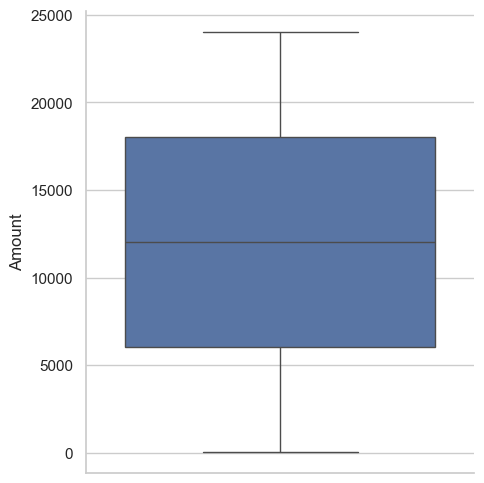

In [36]:
sns.catplot(data = df['Amount'], kind = "box")

In [37]:
df['Class'].info()
df['Class'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 568630 entries, 0 to 568629
Series name: Class
Non-Null Count   Dtype
--------------   -----
568630 non-null  int64
dtypes: int64(1)
memory usage: 4.3 MB


Class
0    284315
1    284315
Name: count, dtype: int64

In [48]:
fraudulent = df[df['Class'] == 1]
print(fraudulent)

            id        V1        V2        V3        V4        V5        V6  \
541        541 -0.478427  0.142165 -0.046838  0.683350  0.067820 -0.404898   
623        623 -0.617111 -1.733888  1.150655  0.207829  0.903533 -0.171524   
4920      4920 -0.476617  0.088942  0.326333  0.220370 -0.026730  0.432409   
6108      6108 -0.832953 -0.024254 -0.260967  0.323532 -0.117119 -0.589167   
6329      6329  1.020308  0.425645 -0.554113  0.868349  2.367343 -0.360087   
...        ...       ...       ...       ...       ...       ...       ...   
568625  568625 -0.833437  0.061886 -0.899794  0.904227 -1.002401  0.481454   
568626  568626 -0.670459 -0.202896 -0.068129 -0.267328 -0.133660  0.237148   
568627  568627 -0.311997 -0.004095  0.137526 -0.035893 -0.042291  0.121098   
568628  568628  0.636871 -0.516970 -0.300889 -0.144480  0.131042 -0.294148   
568629  568629 -0.795144  0.433236 -0.649140  0.374732 -0.244976 -0.603493   

              V7        V8        V9  ...       V21       V22  

In [46]:
non_fraudulent = df[df['Class'] == 0]
print(non_fraudulent)

            id        V1        V2        V3        V4        V5        V6  \
0            0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898   
1            1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605   
2            2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481   
3            3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312   
4            4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549   
...        ...       ...       ...       ...       ...       ...       ...   
284802  284802 -1.605484  2.041786 -1.198693 -1.883651 -1.054493 -1.199907   
284803  284803 -0.080325 -0.463534  1.977771 -1.016889  0.643741  1.046862   
284804  284804  1.653848 -0.550318 -0.382720 -0.914126  1.676939  2.007193   
284805  284805  0.097216 -0.271727  0.875060 -0.333300  0.116064  0.819487   
284806  284806 -0.013366 -0.510551  0.875610 -0.885602  0.248619  0.088888   

              V7        V8        V9  ...       V21       V22  

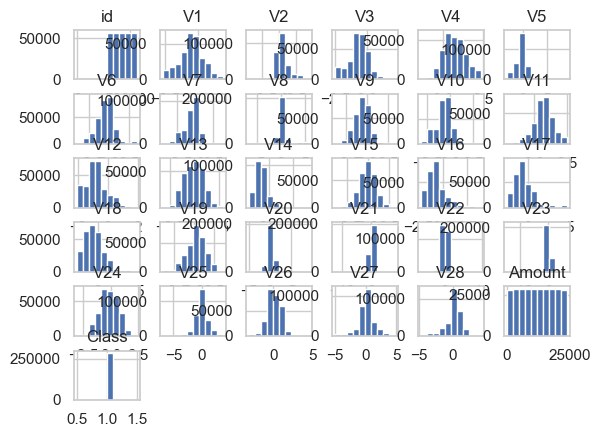

In [94]:
fraudulent.hist()
plt.show()

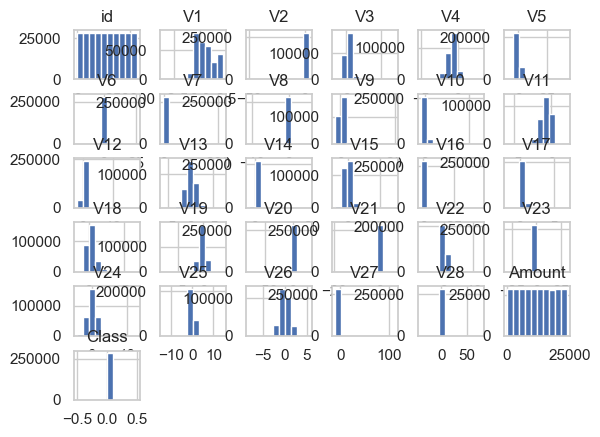

In [68]:
non_fraudulent.hist()
plt.show()

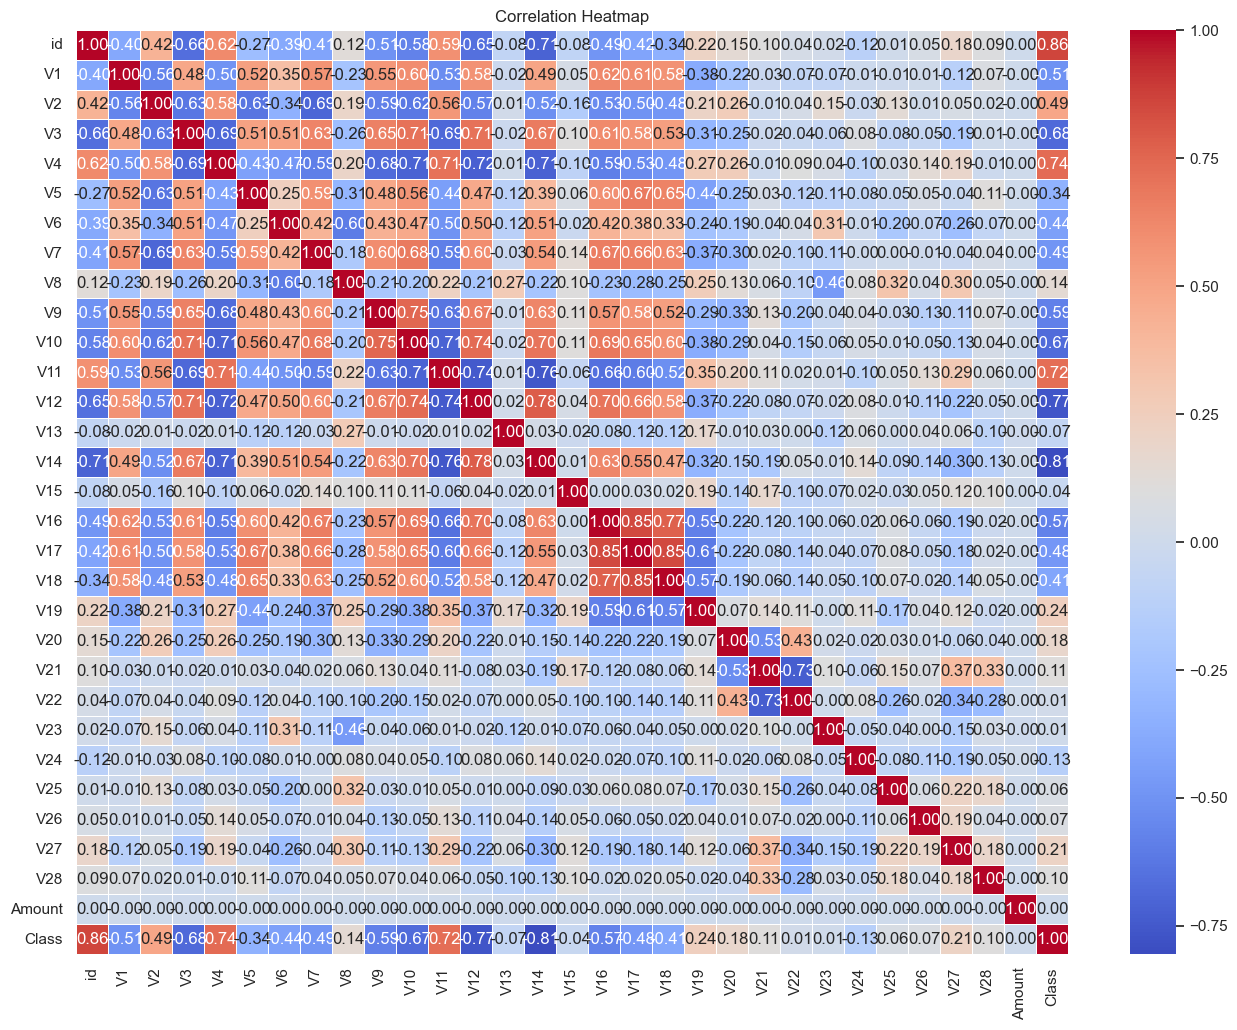

In [72]:
matrix = df.corr()

plt.figure(figsize=(16,12))
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()



In [74]:
print(df.shape)

(568630, 31)


In [76]:
from sklearn.decomposition import PCA
pca = PCA(2)
projected = pca.fit_transform(df)
print(df.shape)
print(projected.shape)

(568630, 31)
(568630, 2)


In [84]:
df_new = df.drop('id', axis=1)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568630 non-null  float64
 1   V2      568630 non-null  float64
 2   V3      568630 non-null  float64
 3   V4      568630 non-null  float64
 4   V5      568630 non-null  float64
 5   V6      568630 non-null  float64
 6   V7      568630 non-null  float64
 7   V8      568630 non-null  float64
 8   V9      568630 non-null  float64
 9   V10     568630 non-null  float64
 10  V11     568630 non-null  float64
 11  V12     568630 non-null  float64
 12  V13     568630 non-null  float64
 13  V14     568630 non-null  float64
 14  V15     568630 non-null  float64
 15  V16     568630 non-null  float64
 16  V17     568630 non-null  float64
 17  V18     568630 non-null  float64
 18  V19     568630 non-null  float64
 19  V20     568630 non-null  float64
 20  V21     568630 non-null  float64
 21  V22     56

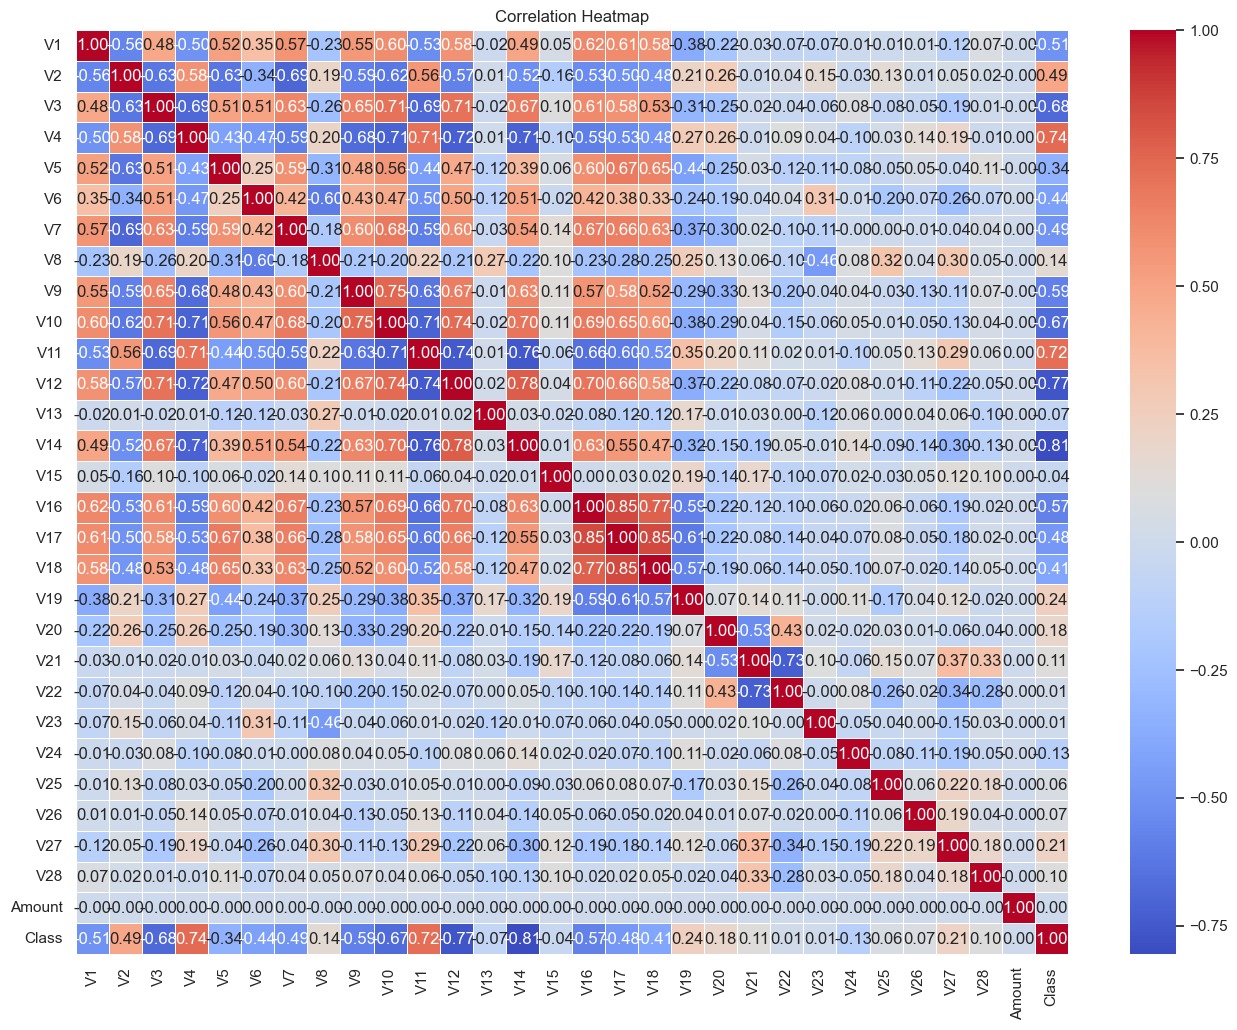

In [88]:
new_matrix = df_new.corr()

plt.figure(figsize=(16,12))
sns.heatmap(new_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
